# Python Workshop

This workshop will cover the essentials Python for data science, including the Pandas library for data exploration, Numpy for arrays and linear algebra operations, and Matplotlib and Seaborn for data visualization. Participants will learn how to import and work with data sets, perform basic operations on arrays, and create custom visualizations to represent their findings.

Before we can use any of these libraries, we must import them. To import a library you have use the `import` statement followed by the library name. You can then give it an alias using the `as` statement, such as `pd` for Pandas, `np` for Numpy, `plt` for Matplotlib's Pyplot, and `sns` for Seaborn.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Before diving into the data, we will review the basics.

## Review of the Basics

In this section, we shall review variables, data types, loops, functions, lists and dictionaries.

In [2]:
# Assign a value to a variable
x = 10
y = 5

In [3]:
# Data types
a = 'Hello, World!' # string
b = 20 # integer
c = 20.5 # float
d = True # boolean

In [4]:
# Basic arithmetic operations
sum = x + y
diff = x - y
product = x * y
quotient = x / y

In [5]:
# Conditional statements
if x > y:
  print('x is greater than y')
elif x == y:
  print('x is equal to y')
else:
  print('x is less than y')

x is greater than y


In [6]:
# Loops
for i in range(5):
  print(i)

0
1
2
3
4


In [7]:
# Functions
def add_numbers(x, y):
  return x + y

result = add_numbers(x, y)
print(result)

15


In [8]:
# Lists
f = [1, 2, 3, 4, 5]

# Accessing values in a list
print(f[0]) # prints 1
print(f[2]) # prints 3

# Looping through a list
for item in f:
  print(item)

1
3
1
2
3
4
5


In [9]:
# Dictionaries
e = {
  'name': 'John Doe',
  'age': 30,
  'country': 'USA'
}

# Accessing values in a dictionary
print(e['name'])
print(e['age'])
print(e['country'])

John Doe
30
USA


## Introduction to Pandas

Pandas is a popular open-source library in Python for data analysis and manipulation. It provides data structures for efficiently storing large datasets and tools for working with them.

Series and data frames are the two most important objects
in the Pandas library. They are used to store information in an indexed manner, and they integrate very well with basic Python. Since data frames are essentially a collection of series in Pandas, we shall cover series first before getting into data frames.

### Creating Pandas Series

A Pandas series is a 1-dimensional labeled array-like object capable of holding any data type. For simplicities sake, you can think of series like a list in Python, but each element of that list has its own label. We can make series with both lists and dictionaries as shown below.

In [11]:
# Creating a series from a list
data = [1, 2, 3, 4, 5]
pd.Series(data)

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [12]:
# Creating a series from a dictionary
data = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
pd.Series(data)

a    1
b    2
c    3
d    4
e    5
dtype: int64

Notice how when the dictionary was passed in, the index labels were determined by the keys in the dictionary. We can do the same with the list by passing in another list corresponding to the labels.

In [13]:
# Creating a list
data = [1, 2, 3, 4, 5]
# Creating an index (labels) for the list
labels = ['a', 'b', 'c', 'd', 'e']

# Creating a series from a list with an index
pd.Series(data, index = labels)

a    1
b    2
c    3
d    4
e    5
dtype: int64

By passing in an index, we can achieve the same result as we did with the dictionary. This brings up an important aspect of the series called the index. Every Pandas series has an index which allows for the access of the elements the series stores. The index of a series can be retrived as follows.

In [14]:
# Creating a series using the data from the previous
s = pd.Series(data, index = labels)

# Getting the index object
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

### Accessing Pandas Series

Now that we have gone over what a series is and how to create one, lets go over how to access it. There are multiple ways to access the elements of series, which we will demonstrate below using the series s.

In [15]:
# Recall the series s
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [16]:
# Getting the element at the second index position
print(s.iloc[1])

# An alternative approach
print(s[1])

2
2


In [17]:
# Getting the element with index label b
print(s.loc['b'])

# An alternative approach
print(s['b'])

2
2


As you can see, you can retrieve an element by it index position using `.iloc[]`, by index label using `.loc[]`, or by either by just using `[]`. Although just using `[]` will work in both case, it is reccomended to use `.iloc[]` and `.loc[]` instead. 

You can also retrive multiple elements from a series using a slice. To slice a series, pass in the colon `:` operator inside the index operator `[]`, with the first and last elements you want on either side of the `:`. Make sure to remember that a slice will include the element you provide an index for, and go upto but not include the last element you provide an index for, unless you are using an index label (i.e. `.loc[]`).

In [18]:
# Getting the first two elements of series s
s.iloc[0:2]

a    1
b    2
dtype: int64

In [62]:
# Getting elements at index label b to d of series s
s.loc['b':'d']

b    2
c    3
d    4
dtype: int64

Using our ability to access the data in a series, we can change the elements they store. To do this we simply access the series series using one `iloc[]`, `.loc[]`, or `[]` and assgin it a new value.

In [64]:
# Recall series s
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [65]:
# Changing the element at index label c to be the word three
s.loc['c'] = 'Three'

In [66]:
# Ouputting our modified series
s

a        1
b        2
c    Three
d        4
e        5
dtype: object

### Series Functionality

The main functionality panda's series have to offer, is that they allow for elementwise comparisons and operations. 

First, let's look at boolean comparisons. For a series we can take a normal boolean comparison, like `> 3`, and apply it to each element of the series. We can try this with series s.

In [68]:
# Creating a new series
data = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
s = pd.Series(data)

s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [69]:
# Checking which elements are greater than 3
s > 3

a    False
b    False
c    False
d     True
e     True
dtype: bool

As you can see by the output, this comparison was applied to each element, and a true or false value was return from the comparison. This is what is called a boolean mask. These are very useful for retrieving certain elements which meet a specific condition. With these masks, we can then pass them back into the index operators `[]`, and retrieve all the elements for which the condition is true for.

In [70]:
# Getting all elements which are greater than 3
s[s > 3]

d    4
e    5
dtype: int64

This elementwise functionality of Pandas series also allows us to apply operations to each element. For the same series `s` we can add, subtract, multiply, and divide each element. There are many different kinds of operations we can apply to each element, however we are only going to demonstrate addition and multiplication. To add 2 to each element of series `s`, we can perform the following.

In [71]:
# Recall series s
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [72]:
# Adding 2 to each element of s
s + 2

a    3
b    4
c    5
d    6
e    7
dtype: int64

Instead of adding 2 to each element, we could by 2 multiply instead.

In [73]:
# Multiplying each element of s by 2
s * 2

a     2
b     4
c     6
d     8
e    10
dtype: int64

Lastly, Pandas series also offer methods to compute sample statistics of the elements in the series. This allows us to calculate the sample mean, median, standard deviation, and many other sample statistics.

To demostrate this functionality, consider the following series `s`.

In [74]:
# Creating a new series
data = [16, 23, 32, 20, 10, 17, 30, 90]
s = pd.Series(data)

s

0    16
1    23
2    32
3    20
4    10
5    17
6    30
7    90
dtype: int64

We can calculate the mean and median of this series using the `.mean()` and `.median()` functions. As we would suspect, the median is significantly small than the mean because there is one large outlier.

In [77]:
# Calculating the mean of s
s.mean()

29.75

In [78]:
# Calculating the median of s
s.median()

21.5

All of these sample statistics can also be calculated with the `.describe()` function as shown below.

In [34]:
# Calculating sample statistics of s
s.describe()

count     8.00000
mean     29.75000
std      25.40388
min      10.00000
25%      16.75000
50%      21.50000
75%      30.50000
max      90.00000
dtype: float64

### Creating Pandas Data Frame

A Pandas data frame is a type of data structure used to store and manipulate data in tables, with labeled rows and columns. For simplicities sake, you can think of a data frame like like a bunch of series all with the same index, and that same index will become the column labels. 

We can make data frames with both lists and dictionaries. However, it is easiest if we use a dictionary storing lists. Let's look at a basic example below.

In [19]:
# Creating a Pandas data frame with a dictionary
df = pd.DataFrame({
    'Name': ['John', 'Jane', 'Jim', 'Joan'],
    'Age': [30, 28, 35, 40],
    'Country': ['USA', 'Canada', 'UK', 'Australia']
})

To create this data frame, we passed a dictionary with keys `Name`, `Age` and `Country` which all will become column labels. The values stored corresponding to these keys are lists. Each list will be stored in the column that corresponds to its key in the dictionary. To better understand what is going on, let's look at the actual data frame.

In [20]:
# Print the data frame
df

,Name,Age,Country
0,John,30,USA
1,Jane,28,Canada
2,Jim,35,UK
3,Joan,40,Australia


As you can see by the output, each element in the dictionary becomes its own column. Just like series, data frames have index which can be retrieved using `.index` attribute.

In [21]:
# Getting data frame index
df.index

RangeIndex(start=0, stop=4, step=1)

If we would like to view this index as a list instead of a range, we can use the `.to_list()`.

In [22]:
# Getting data frame index as a list
df.index.to_list()

[0, 1, 2, 3]

On top of this, Pandas data frames also have a column index. To retrieve the column index, we can use `.columns` attribute.

In [23]:
# Getting column labels of data frame
df.columns

Index(['Name', 'Age', 'Country'], dtype='object')

### Accessing Pandas Data Frame

Now that we have gone over what a data frame is and how to create one, lets go over how to access it. There are multiple ways to access the elements of data frame, which we will demonstrate below using the data frame `df`.

In [24]:
# Recall the data frame
df

,Name,Age,Country
0,John,30,USA
1,Jane,28,Canada
2,Jim,35,UK
3,Joan,40,Australia


Similar to series, `.iloc[]`, and `.loc[]` can all be used to access the elements of a data frame. However, instead only providing one index to retrieve a single element like you did with series, you now have to provide two. The first index passed in will correspond to the row, and the second index will correspond to the column, and they should be seperate by a comma.

Let's try getting the `Age` of `Jim` from data frame above

In [25]:
# Getting the Age of Jim by index label
df.loc[2, 'Age']

35

In [26]:
# Getting the Age of Jim by index position
df.iloc[2, 1]

35

As you can see, to retrieve an element in a data frame, you can use both the index label or the index position. If you decide to use the index position with `.iloc[]`, try to remember that the index positions start at 0 and not 1.

Pandas data frames also allow you to return entire columns too. To do this, the index operator `[]`, `.iloc[]`, and `.loc[]` will all work. As an example, let's retrieve the `Country` column from the data frame.

In [85]:
# Getting the Country column by index label
df['Country']

0          USA
1       Canada
2           UK
3    Australia
Name: Country, dtype: object

In [86]:
# Getting the Country column by index label
df.loc[:, 'Country']

0          USA
1       Canada
2           UK
3    Australia
Name: Country, dtype: object

In [87]:
# Getting the Country column by index position
df.iloc[: , 2]

0          USA
1       Canada
2           UK
3    Australia
Name: Country, dtype: object

As you can see, the first approach does not involve a slice, so it is by far the easist way to return a column. However, when trying to retrieve a row, the first approach will not work. Therefore, it is very important to understand slices and how they can be used in data frames.

The slice operator `:` can be used in either the row or column index of a data frame. It tells Pandas that you want all the observations across a row or column. This is best shown by an example.

In [89]:
# Recall the data frame
df

,Name,Age,Country
0,John,30,USA
1,Jane,28,Canada
2,Jim,35,UK
3,Joan,40,Australia


To retrieve the entire first row of `df`, we can use the slice operator `:` in place of the column index.

In [90]:
# Getting the entire first row by index position
df.iloc[0, :]

Name       John
Age          30
Country     USA
Name: 0, dtype: object

In [91]:
# Getting the entire first row by index label
df.loc[0, :]

Name       John
Age          30
Country     USA
Name: 0, dtype: object

Although these two approaches have the same index for this example, that is only the case because our index positions and labels are the same.

Now that we know how to access the elements of a data frame, changing them is simple. For example, let's change the name `John` to `Johnathan` in our data frame `df`.

In [93]:
# Recall the data frame
df

,Name,Age,Country
0,John,30,USA
1,Jane,28,Canada
2,Jim,35,UK
3,Joan,40,Australia


In [94]:
# Changing the element John to Johnathan
df.loc[0, 'Name'] = 'Johnathan'

In [95]:
# Outputting the modified data frame
df

,Name,Age,Country
0,Johnathan,30,USA
1,Jane,28,Canada
2,Jim,35,UK
3,Joan,40,Australia


### Data Frame Functionality

Similar to series, the main functionality data frames have to offer is there ability to allow elementwise comparisons and operations. On top of that, data frames offer this same functionality to the rows and columns of the data frame.

First, let's look at boolean comparisons. For a data frame we can take a normal boolean comparison, like `Age > 30`, and apply it to each element of the data frame. We can try this with data frame `df`.

In [45]:
# Checking which Ages are greater than 30
df['Age'] > 30

0    False
1    False
2     True
3     True
Name: Age, dtype: bool

As you can see by the output, this comparison was applied to each element, and a boolean mask was return. Like we did with series, we can now use this mask to retrieve all the rows for which the condition is true for by passing it into the index operator.

In [96]:
# Getting all people whos Ages are greater than 30
df[df['Age'] > 30]

,Name,Age,Country
2,Jim,35,UK
3,Joan,40,Australia


Since we are dealing with multiple columns when using data frames, we can create a mask with two boolean comparisons instead. To do this we need to make use of the "and" operator `&`, and the "or" operator `|`. The "and" operator `&` means that both of the boolean condition must be true for the mask to return true for a row. The "or" operator `|` only requires one of the two boolean conditions to be true for the mask to return true for a row.

For example, let's try return all people in `df` whose `Age` is greater than 30 and Country is the `UK`.

In [98]:
# Getting all people whos Ages are greater than 30 and Country is the UK
df[(df['Age'] > 30) & (df['Country'] == 'UK')]

,Name,Age,Country
2,Jim,35,UK


It is important to remember to put brackets around each of your boolean comparisons.

Lastly, Pandas data frames also offer methods to compute sample statistics of the elements, rows, and columns in the data frame. This allows us to calculate the sample mean, median, standard deviation, and many other sample statistics.

We can demonstrate this on the following data frame.

In [100]:
# Creating a Pandas data frame with a dictionary
df = pd.DataFrame({
    'Age': [30, 28, 35, 40],
    'Weight': [160, 123, 194, 141]
})

In [101]:
# Computing the mean Age and Weight
df.mean()

Age        33.25
Weight    154.50
dtype: float64

In [102]:
# Computing the median Age and Weight
df.median()

Age        32.5
Weight    150.5
dtype: float64

The `.describe()` method works for data frames as well.

In [103]:
# Calculating sample statistics of the data frame
df.describe()

,Age,Weight
count,4.000000,4.000000
mean,33.250000,154.500000
std,5.377422,30.358964
min,28.000000,123.000000
25%,29.500000,136.500000
50%,32.500000,150.500000
75%,36.250000,168.500000
max,40.000000,194.000000


### Real World Example: University Rankings

As an example for the real world application of Pandas, let's import "Times World University Rankings" dataset.

To import a csv dataset in Pandas, use the `pd.read_csv()` and pass in the name of the dataset as an argument. For the purposes of this lab I have included a link to download the dataset, but the line below it is what the proper call would look like if you had the data download.

In [106]:
# Load sample data into a pandas DataFrame
uni_df = pd.read_csv('https://raw.githubusercontent.com/michaelritacco/Python-Workshop/main/university_rankings.csv')
# uni_df = pd.read_csv('university_rankings.csv')

To output the top number of rows of a data frame, use the `.head()`. By default, this function outputs the first 5 rows.

In [107]:
# Printing first 5 rows of the data
uni_df.head()

,World_Rank,University_Name,Country,Teaching_Rating,Inter_Outlook_Rating,Research_Rating,Citations_Rating,Industry_Income_Rating,Total_Score,Num_Students,Student/Staff_Ratio,%_Inter_Students,%_Female_Students,Year
0,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33,2016
1,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46,2016
2,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42,2016
3,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55,92.8,18812.0,11.8,34.0,46,2016
4,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92,11074.0,9.0,33.0,37,2016


As an example, let's find the median number of students for all American universities. 

In [120]:
# Creating a mask for all American universities
mask_us = uni_df.Country == 'United States of America'

# Data frame of American universities
us_df = uni_df[mask_us]

# Calculating the median number of students for American universities
us_median_students = us_df['Num_Students'].median()

# Outputing the median number of students for American universities
print('Median = {:.0f} Students'.format(us_median_students))

Median = 21270 Students


**Exercise:** Find the average teaching rating of Canadian universities that are in the top 300 universities in the world? (i.e. they have a world rank of 300 or less) 

In [122]:
# Creating a mask for Canadian universities that are in
# the top 300 universities in the world
mask_canada = (uni_df.Country == 'Canada') & (uni_df.World_Rank < 300)

# Data frame of Canadian universities in the top 300
canada_df = uni_df[mask_canada]

# Calculating the mean teacher rating for Canadian universities
canada_avg_rating = canada_df['Teaching_Rating'].mean()

# Outputing the average teaching rating for Canadian universities
print('Average = {:.3f}%'.format(canada_avg_rating))

Average = 41.813%


## Introduction to Numpy

NumPy is a library in Python for numerical computing and data analysis using arrays. It provides tools for operations such as linear algebra, statistical analysis, and random number generation, and integrates well with other libraries like Pandas and Matplotlib.

### Creating Numpy Arrays

First, lets take a look at what Numpy array is, and how to create one. To create a 1-dimensional Numpy array, you pass in a Python list to the `np.array()` function. Conceptually, it is easiest to think of a 1D Numpy array as a Python list that is optimized to work faster.

In [27]:
# Creating a 1D numpy array
array_1d = np.array([1, 2, 3, 4, 5])

array_1d

array([1, 2, 3, 4, 5])

These array can also take in string values as well.

In [28]:
# Creating a 1D numpy array containing strings
array_1d = np.array(['One', 'Two', 'Three', 'Four', 'Five'])

array_1d

array(['One', 'Two', 'Three', 'Four', 'Five'], dtype='<U5')

We can construct a 2-dimensional Numpy array in a very similar way, but instead of passing in a single list, you pass in a list of lists. Creating a 2D Numpy array is essentially the same thing as creating a matrix, which is shown by the output below.

In [29]:
# Create a 2D numpy array
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

As you can see, each individual list inside of the bigger list becomes a row of the matrix. It is important to note that all of the individual lists must be the same size for this to work.

Each Numpy array that we create has a shape. The shape can be accessed using `.shape` attribute, which returns a tuple in the form `(number_of_rows, number_of_columns)`. For `array_2d`, the shape would be:

In [30]:
# Getting the shape
array_2d.shape

(3, 3)

### Accessing Numpy Arrays

Accessing Numpy arrays works very similarly to access Pandas series and data frames. For a 1D Numpy array, we use the index operator `[]` to access elements by their positon. 

It is important to remember that you are accessing by an index, which in Python, are zero-based. This means the first element in an array is at index 0, so to access it you would use `[0]`. 

As an example for accessing a 1D array, lets access the second element of the following array.

In [31]:
# Creating a 1D numpy array containing strings
array_1d = np.array(['One', 'Two', 'Three', 'Four', 'Five'])

# Getting the 2nd element at index 3
array_1d[2]

'Three'

Similarly to the Panda's series, we can use a slice. Let's trying retriving all the elements in `array_1d`.

In [32]:
array_1d[:]

array(['One', 'Two', 'Three', 'Four', 'Five'], dtype='<U5')

As you can see from the example above, when we don't provide a start and stop index, the `:` operator returns the whole array. This is quite useful when dealing with matrices.

When accessing a 2D Numpy array, you will now need to provide two indexes to return a single element. The first will be the row index, and the second will be the column index, which are seperated by a comma. Remember, both of these indexes start at 0.

As an example for accessing a 2D array, lets access the element in the second row and third column.

In [33]:
# Create a 2D numpy array
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [34]:
# Getting the element in the 2nd row and 3rd column
array_2d[1, 2]

6

Slices still work for 2D arrays and are very useful. They can be used inplace of one of the indexes to return entire rows or columns. Lets return the entire second row of `array_2`.

In [35]:
# Getting every element in the 2nd row
array_2d[1, :]

array([4, 5, 6])

It is important to note that when we use a slice of a 2D array to return a row or column, a 1D array will be return.

### Numpy Methods

Similar to Pandas, Numpy has a number of different methods to summarize or apply operations to the elements of an array. For this section, we will show how these functions work for a 1D Numpy array, but it should be mentioned they will work for 2D arrays just as well. For calculating the sum, maximum, minimum, and mean of the elements in an array, we would use the following:

In [36]:
# Creating an array
array_1d = np.array([1, 2, 3, 4, 5, 6])

# Calculating sum
print(np.sum(array_1d))

# Calculating mean
print(np.mean(array_1d))

# Finding minimum value
print(np.min(array_1d))

# Finding maximum value
print(np.max(array_1d))

21
3.5
1
6


Numpy arrays also have the ability to apply operations (like addition or multiplicaiton) to each element of the array. We can show this with `array_1d`.

In [37]:
# Recall array_1D
array_1d

array([1, 2, 3, 4, 5, 6])

In [40]:
# Adding 2 to each element
array_1d + 2

array([3, 4, 5, 6, 7, 8])

In [41]:
# Multiplying each element by 2
array_1d * 2

array([ 2,  4,  6,  8, 10, 12])

Numpy arrays also allow us to apply matrix operations like matrix multiplication and tranposing. We will demonstrate this with `array_2d`.

In [42]:
# Create a 2D numpy array
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

array_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [43]:
# Matrix multiplication  
array_2d @ array_2d

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [44]:
# Transposing
array_2d.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

One of the more important numpy methods is `.reshape()`. This method takes in two arguments which specify the new number of rows and columns the array should have after rearranging. For example, we can reshape `array_1d` into a 2 x 3 matrix as follows.

In [45]:
# Reshaping array_1d into a 2x3 matrix
array_1d.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

A special argument for the reshape method is `-1`, which can only be passed as one out of the two arguments. This tell Numpy to fit the shape specified by the other shape argument first. Reshaping `array_1d` into a matrix with 1 column.

In [46]:
# Reshaping
array_1d.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

Numpy also has methods for generating random numbers. This is extreme useful for generating simulated data. When we generate numbers we will set a seed everytime. This seed ensure that when you rerun the code the generated numbers will always be the same. You can thing of the seed as the starting place we use when selecting random numbers.

To demonstrate number generation, lets generate 5 random numbers from the standard normal distribution.

In [47]:
# Generating random numbers from N(0, 1)
np.random.seed(0)
rand_numbers = np.random.normal(size = 5)

# view the result
rand_numbers

array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799])

Numpy also has a function `linspace()` which can be used to create linearly spaced numbers from a minimum to a maximum.

In [48]:
# Generate numbers 20 numbers from 0-10
linear_numbers = np.linspace(0, 10, 20)

# View the result
linear_numbers

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

The last Numpy feature we will cover is its ability to convert Pandas objects to Numpy arrays. Consider the following series:

In [49]:
# Creating a pandas series
s = pd.Series([1, 2, 3, 4, 5])

# Converting to numpy array
s.values

array([1, 2, 3, 4, 5], dtype=int64)

## Data Visualization with Matplotlib and Seaborn

Matplotlib and Seaborn are two powerful libraries in Python for data visualization. They allow us to create various types of plots, including line charts, scatter plots, histograms, and more, to effectively visualize and analyze data. They also have options for customizing the appearance of the plots, including colors, labels, and more. In this section, we will rely on the tools we learned earlier to demonstrate how Matplotlib and Seaborn work.

In [50]:
# Setting the style
sns.set_style('darkgrid')

### Line Plot

As an introduction to plotting, we shall first show how to create a line plot using Matplotlib. Before we can plot, let's use Numpy to build some data. For this example, we will generate evenly spaced numbers starting at 1 and incrementing by 0.1 upto 10 for our x-axis. For our y-axis, we will plot the sin of these numbers.

In [51]:
# Generating some data for the independent variable x
x = np.arange(0, 10, 0.1)
y = np.sin(x)

To plot this data, we shall use the Matplotlib function `plot()`. This function takes in two arrays, `x` and `y`, and plots them as a line graph. Using the other Matplotlib functions below, we can add a title and labels both the x- and y-axis. Finally, the `show()` function is called at the end to display the plot.

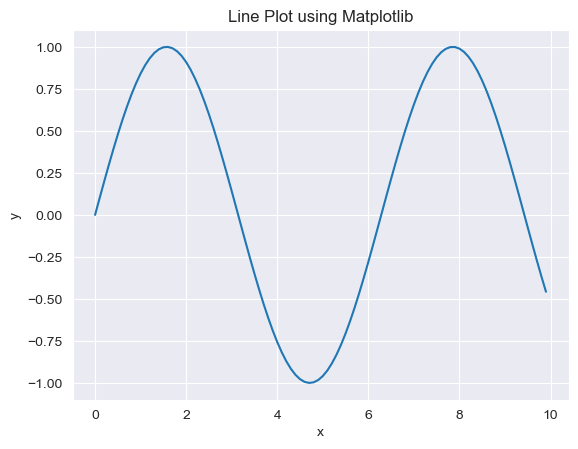

In [52]:
# Using Matplotlib to create a line plot
plt.plot(x, y)

# Adding axis labels and a title
plt.title('Line Plot using Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

# Showing the plot
plt.show()

Since the Seaborn library is built on top of Matplotlib, the code to create the same plot in Seaborn is very similar. This is shown below.

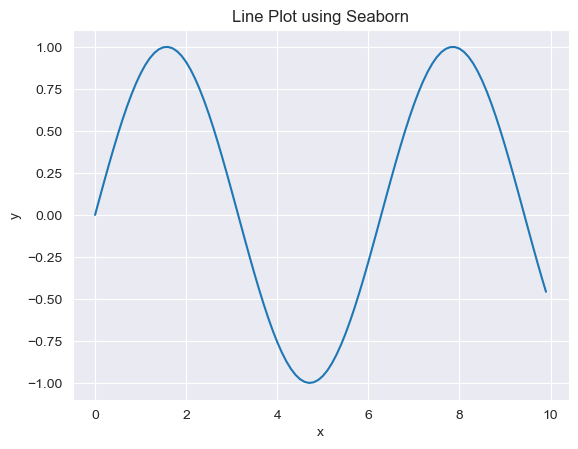

In [53]:
# Using Seaborn to create a line plot
sns.lineplot(x = x, y = y)

# Adding axis labels and a title
plt.title('Line Plot using Seaborn')
plt.xlabel('x')
plt.ylabel('y')

# Showing the plot
plt.show()

Since the code is so similar for plotting using Seaborn and Matplotlib, the rest of the plots will only be made with one of the libraries. Next, let's look at how to create a scatter plot using Matplotlib.

### Scatter Plot

For this scatter plot, we will need some data. Using Numpy, we will generate two arrays `x` and `y`. The `x` array will be filled with 100 randomly generated numbers from a standard normal distribution. The `y` array will then be the `x` array plus the values of another 100 randomly generated numbers from a standard normal distribution.

In [54]:
# Generating random data from N(0, 1)
np.random.seed(0)
x = np.random.normal(size = 100)
y = x + np.random.normal(size = 100)

To plot this data, we shall use the Matplotlib function `scatter()`. This function takes in two arrays, `x` and `y`, and then pairs up each `(x, y)` observation and plots them as points. To complete the plot, we add a title and axes labels.

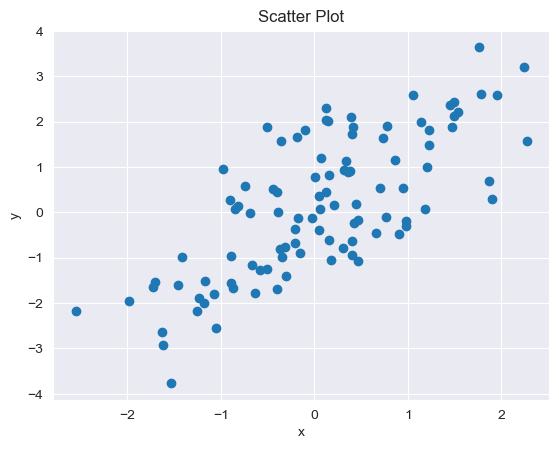

In [55]:
# Plotting the data points
plt.scatter(x, y)

# Adding labels and title to the plot
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')

# Showing the plot
plt.show()

### Histogram

In order to build a histogram, we will use Numpy to generate an array `x` containing a 1000 random observations from the standard normal distribution.

In [56]:
# Generating random data from N(0, 1)
x = np.random.normal(size = 1000)

To build a histogram of this data, we will use the Seaborn function `histplot()`. This function takes in only one array `x` and plots the frequency distribution of the `x` values. For this example, I have also included kernal density estimate by passing the argument `kde = True`, which is really just an estimate for the distribution of `x`. To complete the plot, we add a title and axes labels.

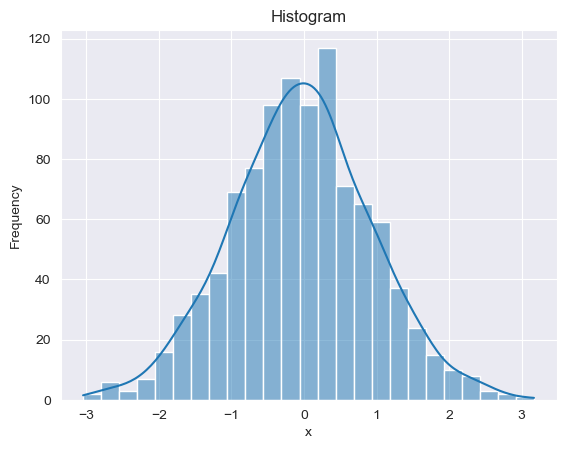

In [57]:
# Creating histogram using seaborn
sns.histplot(x, kde = True)

# Adding a title and axis labels
plt.title('Histogram')
plt.xlabel('x')
plt.ylabel("Frequency")

# Showing plot
plt.show()

### Bar Plot

To build a barplot, we will build a data frame with categories and their corresponding values.

In [58]:
# Creating a dataframe
barplot_df = pd.DataFrame({'Category': ['A', 'B', 'C', 'D'],
                           'Value': [5, 6, 7, 8]})

We can then use the Seaborn function `barplot()` to build a bar plot of this data. The function takes in arguments `x` and `y` to specify which columns in the data frame will be used for the x-axis and y-axis, respectively. The last arugment `data` is used to specify the data frame we want to use. For this example, the x-axis corresponds to the `Category` column, and the y-axis corresponds to the `Value` column. To complete the plot, we add a title and axes labels.

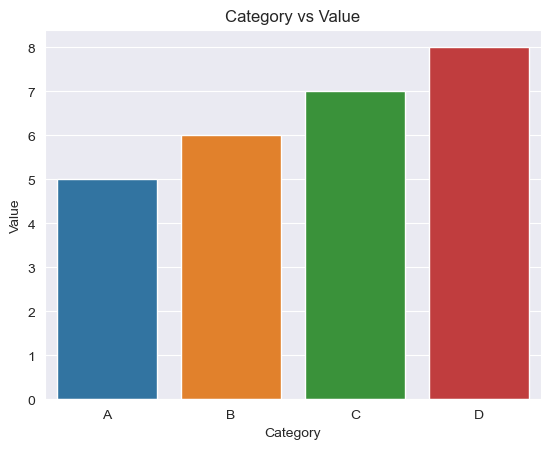

In [59]:
# Creating bar plot
sns.barplot(x = 'Category', y = 'Value', data = barplot_df)

# Adding title and axes labels
plt.title('Category vs Value')
plt.xlabel('Category')
plt.ylabel('Value')

# Showing the plot
plt.show()

### Real World Example: Titanic Dataset

To demonstrate how useful these libraries can be, we will visualize data from a real world example. First, let's import our dataset.

In [60]:
# Loading data into a Pandas data frame
titanic_df = pd.read_csv('https://raw.githubusercontent.com/michaelritacco/Python-Workshop/main/titanic.csv')
# titanic_df = pd.read_csv('titanic.csv')

For this example, we will use the titanic dataset. Let's take a look at the data before plotting.

In [61]:
# Printing first 5 rows of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the output above, we can see that each person has a `Survived` and `Sex` attribute. Using this information, we could investigate the distribution of `Survival` depending whether a passenger is male or female.

To do this, we can use the Seaborn `countplot()` function. This function takes an argument `x` which specifies which columns in the dataframe will be used for the x-axis. Additionally, this function takes in a second argument `hue` which tells the function to plot the data seperately for each category of the `hue`. In this example the `hue` can take on values Male or Female, so `countplot()` will produce two seperate bars of counts for Male or Female.

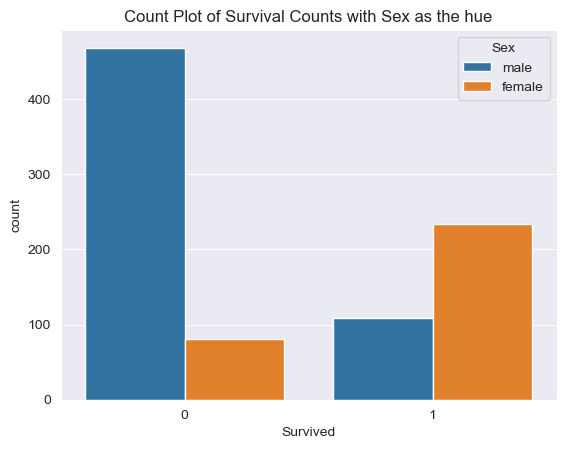

In [62]:
# Choose the variable for the x axis
x = 'Survived'

# Choose the hue variable
hue = 'Sex'

# Making a count plot
sns.countplot(x = x, hue = hue, data = titanic_df)

# Adding a title
plt.title('Count Plot of Survival Counts with Sex as the hue')

# Showing the plot
plt.show()

**Exercise:** Can you plot a histogram of `Age` with `Survived` as the hue?

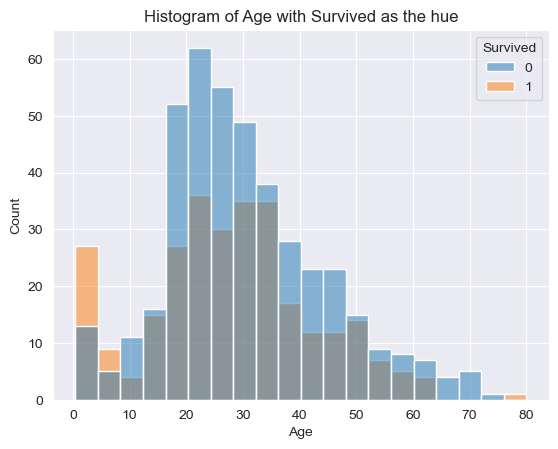

In [64]:
# Choose the variable for the x axis
x = 'Age'

# Choose the hue variable
hue = 'Survived'

# Making the histogram
sns.histplot(x = x, hue = hue, data = titanic_df)

# Adding a title
plt.title('Histogram of Age with Survived as the hue')

# Showing the plot
plt.show()